![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Importamos el excel
hospitalzacion = pd.read_excel("BBDD_Hospitalización.xlsx")
#Creamos una copia del dataframe para trabajar con ella
df = hospitalzacion.copy()
#Vemos la cantidad de registros y columnas
print(f"La cantidad de registros que hay es de {df.shape[0]}, y la cantidad de columnas es de {df.shape[1]}")
#Y realizamos una panorama general de los datos
df.head()

La cantidad de registros que hay es de 570, y la cantidad de columnas es de 20


c:\Users\capo_\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [165]:
#Vemos el tipo de dato de cada columna
df.info()
#Como podemos ver, hay varias columnas que son innecesarias tenerlas en float, cuando podemos tenerlas en entero
#Como por ejemplo "Dias Hospitalizados".
#Respecto a esto vamos a tener que hacer un par de pasos antes para luego hacer la conversion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [166]:
#Observamos la cantidad de nulos por cada columna para luego hacer la transformacion a tipo entero
df.isnull().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [167]:
#Llenamos los valores nulos de las tablas a transformar en "0"
df["EDAD"] = df["EDAD"].fillna(0)
df["NUMERO DE MUESTRAS TOMADAS"] = df["NUMERO DE MUESTRAS TOMADAS"].fillna(0)
df["DIAS HOSPITALIZACION MQ"] = df["DIAS HOSPITALIZACION MQ"].fillna(0)
df["DIAS HOSPITALIZACIÓN UPC"] = df["DIAS HOSPITALIZACIÓN UPC"].fillna(0)

In [168]:
#Una vez realizada la conversion, ahora si podemos pasar los datos a entero.
df['EDAD'] = df['EDAD'].astype(int)
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].astype(int)
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].astype(int)
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].astype(int)

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [169]:
#Vamos a eliminar las columnas "DIAS HOSPITALIZACION MQ" y "DIAS HOSPITALIZACIÓN UPC" 
#ya que no aportan información importante para el análisis de los resultados de los pacientes y no influyen en los resultados.
df = df.drop(columns=["DIAS HOSPITALIZACION MQ","DIAS HOSPITALIZACIÓN UPC"])

In [170]:
#Vamos a eliminar estas columnas ya que no influyen en los resultados:
#Tipo De Cultivo: esta columna indica la forma en que se aisló el agente, pero no es relevante para el análisis de los resultados.

#Numero de Biopsias: la cantidad de biopsias no es fundamental para la muestra, por lo que no aporta información relevante.

#Numero de muestras: la cantidad de muestras tampoco es fundamental para la muestra y no aporta información relevante.

#Biopsias Previas: si esta columna incluyera información más detallada que un simple "Sí" o "No", podría ser importante, pero como no es el caso, no es relevante para el análisis.
df = df.drop(columns=["TIPO DE CULTIVO","NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"
                      ,"NUMERO DE MUESTRAS TOMADAS","BIOPSIAS PREVIAS"])


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

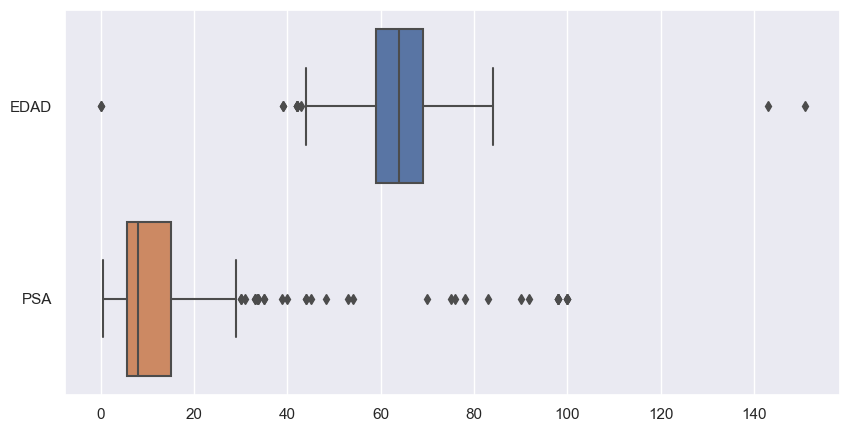

In [171]:
# Creamos en una variable nueva con los datos a analizar por si hay algun outlayer
data = df[['EDAD', 'PSA']]

# Creamos un boxplot 
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data, orient='h')

# Lo mostramos
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [172]:
#Vemos los valores con edades mayores a 130 y procedemos a borrarlos
df = df[df["EDAD"] <= 130]

In [173]:
#Tambien hay valores en edades iguales a 0
#Ademas de esos, ambas filas estan completamente nulas.
df[df["EDAD"]== 0]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
568,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
#Descartamos ambas filas
df = df.drop(index=568)
df = df.drop(index=569)

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

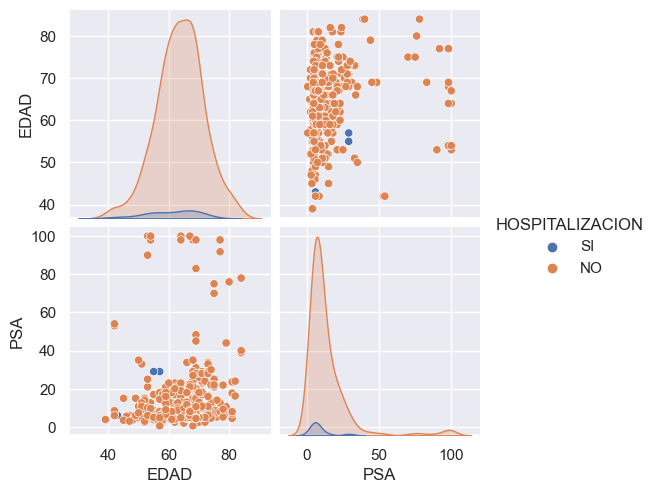

In [175]:
#Realice un vistazo general de comparacion en cada columna cuantos estaban hospitalizados.
sns.pairplot(df,hue='HOSPITALIZACION')

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [176]:
#Revisamos los nulos
df.isnull().sum()

EDAD                                        0
DIABETES                                    0
HOSPITALIZACIÓN ULTIMO MES                  0
PSA                                         4
VOLUMEN PROSTATICO                          1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS     0
CUP                                         1
ENF. CRONICA PULMONAR OBSTRUCTIVA           2
BIOPSIA                                     0
FIEBRE                                      0
ITU                                         0
AGENTE AISLADO                             17
PATRON DE RESISTENCIA                       0
HOSPITALIZACION                             3
dtype: int64

In [177]:
df["PSA"] = df["PSA"].fillna(round(df["PSA"].mean(),1))

In [178]:
#Vemos cuáles son las filas que contienen valores nulos.
df[df["ENF. CRONICA PULMONAR OBSTRUCTIVA"].isnull()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
566,67,NO,NO,8.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NaN,NO,NO
567,59,NO,NO,9.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NaN,NEG,NO,NO,NO,NO,NO


In [179]:
#Comparamos con los casos que no tuvieron alguna enfermedad
df[df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] == "NO"]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,NO,NO,4.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,SI
1,56,NO,NO,7.70,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,SI
2,57,NO,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56,NO,NO,7.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,SI
4,55,NO,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,75,NO,NO,75.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO
562,78,NO,NO,9.30,SI,CEFALOSPORINA_AMINOGLUCOCIDO,NO,NO,NEG,NO,NO,NO,NO,NO
563,67,NO,NO,6.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO
564,64,NO,NO,4.80,SI,OTROS,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO


In [180]:
#De acuerdo con la conclusión, reemplazamos los valores vacíos por 'NO'.
df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = df["ENF. CRONICA PULMONAR OBSTRUCTIVA"].fillna("NO")

In [181]:
#Realizamos el mismo proceso con la variable 'HOSPITALIZACIÓN'.
df[df["HOSPITALIZACION"].isnull()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
31,63,NO,NO,10.8,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN
100,74,NO,NO,5.8,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN
109,61,NO,NO,7.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NaN


In [182]:
#Comparamos con los casos que tuvieron Asma
df[df["ENF. CRONICA PULMONAR OBSTRUCTIVA"]== "SI, ASMA"]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
30,73,NO,NO,7.5,SI,CEFALOSPORINA_AMINOGLUCOCIDO,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO
31,63,NO,NO,10.8,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN
32,73,NO,NO,7.5,SI,CEFALOSPORINA_AMINOGLUCOCIDO,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO
33,63,NO,NO,10.5,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO


In [183]:
#Como ninguno de los pacientes tuvo fiebre, concluyo que no necesitarían hospitalización.
df["HOSPITALIZACION"] = df["HOSPITALIZACION"].fillna("NO")

In [184]:
#Busco todas las personas que tuvieron como antibiotico "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"
df[df["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"] == "FLUOROQUINOLONA_AMINOGLICOSIDO"]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,NO,NO,4.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,SI
1,56,NO,NO,7.70,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,SI
2,57,NO,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56,NO,NO,7.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,SI
4,55,NO,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,75,NO,NO,75.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO
563,67,NO,NO,6.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO
565,69,NO,NO,4.43,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,NaN,NO,NEG,NO,NO,NO,NO,NO
566,67,NO,NO,8.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NaN,NO,NO


In [185]:
#Llego a la conclusion que toda persona que utiliza ese antibiotico tiene como "SI" a Volumen Prostatico y "NO" a CUP
df["VOLUMEN PROSTATICO"] = df["VOLUMEN PROSTATICO"].fillna("SI")
df["CUP"] = df["CUP"].fillna("NO")

In [186]:
df[df["AGENTE AISLADO"].isnull()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
26,75,NO,NO,25.00,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NaN,NO,NO
99,70,NO,NO,7.20,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NaN,NO,NO
106,65,NO,NO,5.97,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NaN,NO,NO
115,56,NO,NO,4.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NaN,NO,NO
116,55,NO,NO,17.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NaN,NO,NO
126,74,NO,NO,8.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NaN,NO,NO
128,69,NO,NO,13.40,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NaN,NO,NO
129,63,NO,NO,11.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NaN,NO,NO
130,63,NO,NO,21.30,SI,OTROS,NO,NO,NEG,NO,NO,NaN,NO,NO
138,64,NO,NO,15.60,SI,CEFALOSPORINA_AMINOGLUCOCIDO,NO,NO,NEG,NO,NO,NaN,NO,NO


In [187]:
df["AGENTE AISLADO"] = df["AGENTE AISLADO"].fillna("NO")

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [188]:
#Para el caso de la EDAD ,NO.
#Ya que cada paciente es importante para el analisis y generalizar una edad para cierto paciente es ineficiente.

In [189]:
#Dentro de la columna "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS" habia 2 variables repetidas, pero con diferente acento
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')

In [190]:
#Cambio las variables "SI, EPOC" y "SI, ASMA" por "SI"
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace(['SI, EPOC', 'SI, ASMA'], 'SI')

In [191]:
#Remplazo los espaciados demas
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 6')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 7 ', 'ADENOCARCINOMA GLEASON 7')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 8 ', 'ADENOCARCINOMA GLEASON 8')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 9')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 10 ', 'ADENOCARCINOMA GLEASON 10')

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [192]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Transformamos las variables categoricas en numeros
modelo_mc = df[['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES',"VOLUMEN PROSTATICO","ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS","CUP","ENF. CRONICA PULMONAR OBSTRUCTIVA","BIOPSIA","FIEBRE","ITU","AGENTE AISLADO","PATRON DE RESISTENCIA","HOSPITALIZACION"]].apply(le.fit_transform)

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [193]:
corr_matrix = df.corr()
corr_matrix

C:\Users\capo_\AppData\Local\Temp\ipykernel_5592\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,EDAD,PSA
EDAD,1.000000,0.183385
PSA,0.183385,1.000000


Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [194]:
modelo_mc.to_csv("modelo_mc.csv")